<a href="https://colab.research.google.com/github/muhammadghazyy/Seleksi-DSA-Compfest-2021/blob/main/Seleksi_DSA_Compfest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

In [ ]:
files.upload()

{}

In [ ]:
jakarta = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx' , sheet_name='Data Indonesia dan Jakarta')

In [ ]:
positif_harian = jakarta['Positif Harian (Jakarta)'].copy()

## Mean median modus max min

In [ ]:
mean = round(positif_harian.mean(),3)
median = positif_harian.median()
modus = positif_harian.mode()
min = positif_harian.min()
max = positif_harian.max()
print(f"Mean = {mean}\nMedian = {median}\nModus = {modus[0]}\nMin = {min}\nMax = {max}")

Mean = 1283.042
Median = 867.0
Modus = 0
Min = 0
Max = 13112


In [ ]:
jakarta.loc[jakarta['Positif Harian (Jakarta)']==0]

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
5,2020-03-06,0,0,4,4,3,0,0,4,7,4,0,0,2,2,0,0,0,0,0,0
6,2020-03-07,0,0,4,4,3,0,0,4,7,4,0,0,0,0,0,0,0,0,0,0
7,2020-03-08,0,0,6,6,3,0,0,4,7,4,0,0,2,2,0,0,0,0,0,0
9,2020-03-10,0,2,25,27,3,0,0,31,34,31,0,2,6,8,0,0,0,0,0,0


## Korelasi

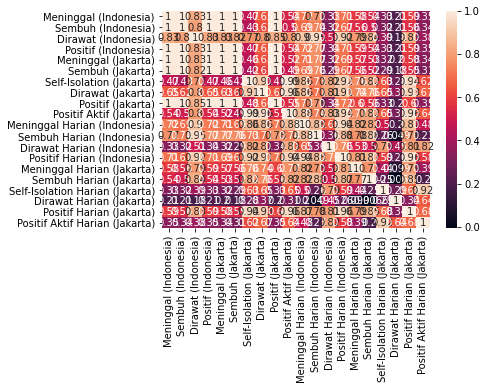

In [ ]:
jktcorr = jakarta.corr()
sns.heatmap(jktcorr, annot=True)
plt.show()

In [ ]:
jktcorr.head()

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
Meninggal (Indonesia),1.000000,0.996944,0.834887,0.998617,0.998967,0.995299,0.473464,0.645345,0.996940,0.535721,0.720103,0.772802,0.334648,0.707057,0.583700,0.538940,0.329980,0.206546,0.590207,0.348791
Sembuh (Indonesia),0.996944,1.000000,0.803703,0.998569,0.996359,0.997307,0.433797,0.623204,0.996050,0.500727,0.687728,0.737878,0.315759,0.673206,0.555434,0.500834,0.322136,0.206310,0.558320,0.342428
Dirawat (Indonesia),0.834887,0.803703,1.000000,0.834368,0.830684,0.820428,0.773220,0.797535,0.849647,0.795478,0.900948,0.953405,0.506871,0.920055,0.794023,0.840769,0.386984,0.181763,0.834625,0.384102
Positif (Indonesia),0.998617,0.998569,0.834368,1.000000,0.997694,0.997557,0.471345,0.648860,0.999018,0.535306,0.718070,0.769282,0.337938,0.706296,0.585794,0.539444,0.333096,0.207430,0.592116,0.351645
Meninggal (Jakarta),0.998967,0.996359,0.830684,0.997694,1.000000,0.996432,0.456952,0.632572,0.996796,0.520052,0.708649,0.766444,0.317422,0.693807,0.574539,0.528502,0.318300,0.198799,0.575740,0.336266


## Outlier

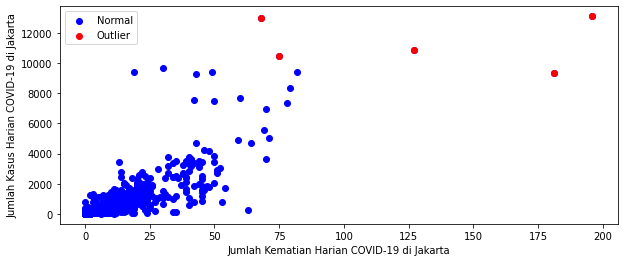

In [ ]:
import sklearn.ensemble
import sklearn.preprocessing

df = jakarta[['Positif Harian (Jakarta)' , 'Meninggal Harian (Jakarta)']]
scaler = sklearn.preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

model = sklearn.ensemble.IsolationForest(contamination=0.01)
model.fit(df)
jakarta['Outlier'] = pd.Series(model.predict(df))

 #plotting
fig, ax = plt.subplots(figsize=(10,4))

a = jakarta.loc[jakarta['Outlier'] == -1, ['Positif Harian (Jakarta)', 'Meninggal Harian (Jakarta)']] #anomaly

ax.scatter(jakarta['Meninggal Harian (Jakarta)'], jakarta['Positif Harian (Jakarta)'], color='blue', label = 'Normal')
ax.scatter(a['Meninggal Harian (Jakarta)'],a['Positif Harian (Jakarta)'], color='red', label = 'Outlier')
plt.legend()
plt.ylabel("Jumlah Kasus Harian COVID-19 di Jakarta")
plt.xlabel("Jumlah Kematian Harian COVID-19 di Jakarta")
plt.show()

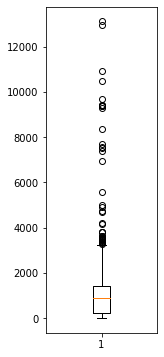

In [ ]:
plt.figure(figsize=(2,6))
plt.boxplot(jakarta['Positif Harian (Jakarta)'])
plt.show()

In [ ]:
jakarta.loc[jakarta['Outlier']==-1]

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Outlier
490,2021-07-04,60582,1928274,295228,2284084,8652,484949,59307,27687,580595,86994,555,13127,13551,27233,75,5799,4366,245,10485,4611,-1
491,2021-07-05,61140,1942690,309999,2313829,8779,491556,62873,28290,591498,91163,558,14416,14771,29745,127,6607,3566,603,10903,4169,-1
493,2021-07-07,62908,1973388,343101,2379397,9042,501199,69644,30418,610303,100062,1040,14835,18504,34379,181,3707,4196,1282,9366,5478,-1
494,2021-07-08,63760,1994573,359455,2417788,9110,512085,72361,29721,623277,102082,852,21185,16354,38391,68,10886,2717,-697,12974,2020,-1
495,2021-07-09,64631,2023548,367733,2455912,9306,526941,73239,26903,636389,100142,871,28975,8278,38124,196,14856,878,-2818,13112,-1940,-1


## EDA 


In [ ]:
files.upload()

KeyboardInterrupt: ignored

In [ ]:
vaksin_jakarta = pd.read_excel('Total Vaksinasi Jakarta.xlsx')

In [ ]:
covid_jakarta = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx' , sheet_name='Data Indonesia dan Jakarta')
covid_jakarta_5maret = covid_jakarta.loc[covid_jakarta['Tanggal']>'2021-03-04'].copy()
# covid_jakarta_5maret.drop(['Jam','Tanggal Jam','Belum Diketahui (masih verifikasi)','Menunggu Hasil','Tenaga Kesehatan Terinfeksi'],axis=1,inplace=True)

covid_jakarta_5maret = pd.DataFrame({
    'Tanggal':covid_jakarta_5maret['Tanggal'],
    'Positif Harian':covid_jakarta_5maret['Positif Harian (Jakarta)'],
    'Meninggal Harian':covid_jakarta_5maret['Meninggal Harian (Jakarta)'],
    'Sembuh Harian':covid_jakarta_5maret['Sembuh Harian (Jakarta)']
})

covid_jakarta_5maret.reset_index(inplace=True)
covid_jakarta_5maret.drop('index',axis=1,inplace=True)

In [ ]:
vaksin_jakarta.head()

In [ ]:
covid_jakarta_5maret.head()

In [ ]:
vaksin_jakarta.isna().sum()

In [ ]:
covid_jakarta_5maret.isna().sum()

In [ ]:
vaksin_jakarta.describe()

In [ ]:
covid_jakarta_5maret.describe()

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(pd.concat([vaksin_jakarta,covid_jakarta_5maret],axis=1).corr(),annot=True)
plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(vaksin_jakarta['Tanggal'],vaksin_jakarta['Vaksinasi 1 Harian'],label = 'Vaksinasi 1 Harian',color='blue')
ax.plot(vaksin_jakarta['Tanggal'],covid_jakarta_5maret['Positif Harian'],label = 'Kasus Positif Harian',color='red')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian')
plt.title('Plot Vaksinasi 1 dan Positif Harian')
ax.legend()
fig.show()

In [ ]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(vaksin_jakarta['Tanggal'],vaksin_jakarta['Vaksinasi 2 Harian'],label = 'Vaksinasi 2 Harian',color='green')
ax.plot(vaksin_jakarta['Tanggal'],covid_jakarta_5maret['Positif Harian'],label = 'Kasus Positif Harian',color='red')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian')
plt.title('Plot Vaksinasi 2 dan Positif Harian')
ax.legend()
fig.show()

In [ ]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(vaksin_jakarta['Tanggal'],vaksin_jakarta['Vaksinasi 1 Harian'],label = 'Vaksinasi 1 Harian',color='blue')
ax.plot(vaksin_jakarta['Tanggal'],covid_jakarta_5maret['Sembuh Harian'],label = 'Sembuh Harian',color='orange')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian')
plt.title('Plot Vaksinasi 1 dan Sembuh Harian')
ax.legend()
fig.show()

In [ ]:
fig , ax = plt.subplots(figsize=(12,5))
ax.plot(vaksin_jakarta['Tanggal'],vaksin_jakarta['Vaksinasi 2 Harian'],label = 'Vaksinasi 2 Harian',color='green')
ax.plot(vaksin_jakarta['Tanggal'],covid_jakarta_5maret['Sembuh Harian'],label = 'Sembuh Harian',color='orange')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian')
plt.title('Plot Vaksinasi 2 dan Sembuh Harian')
ax.legend()
fig.show()

In [ ]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

vaksin_jakarta.loc[detect_outliers(vaksin_jakarta,['Vaksinasi 1 Harian','Vaksinasi 2 Harian'])]

## Initial Findings - Regression

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
#installing scikit-learn 0.24.x
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

x1 = vaksin_jakarta['Vaksinasi 1 Harian'].tolist()
x2 = vaksin_jakarta['Vaksinasi 2 Harian'].tolist()
y = np.array(covid_jakarta_5maret['Positif Harian'].tolist())

In [ ]:
x,i=[],0
while i<len(x1):
  x.append([x1[i],x2[i]])
  i+=1

In [ ]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

In [ ]:
print('Beta0 = ',round(model.intercept_,5))
print('Beta1 = ',round(model.coef_[0],5))
print('Beta2 = ',round(model.coef_[1],5))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
print(f'Nilai R-Squared: {round(r2_score(covid_jakarta_5maret["Positif Harian"],y_pred)*100,3)} %')
print('Nilai MSE: ',round(mean_squared_error(covid_jakarta_5maret['Positif Harian'],y_pred),3))
print('Nilai RMSE: ',round(np.sqrt(mean_squared_error(covid_jakarta_5maret['Positif Harian'],y_pred)),4))
print('Nilai MAE: ',round(mean_absolute_error(covid_jakarta_5maret['Positif Harian'],y_pred),3))
print('Nilai MAPE: ',round(mean_absolute_percentage_error(covid_jakarta_5maret['Positif Harian'],y_pred)*100,3),'%')

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(covid_jakarta_5maret['Tanggal'],covid_jakarta_5maret['Positif Harian'],label = 'Nilai Real')
plt.scatter(covid_jakarta_5maret['Tanggal'],y_pred, label = 'Nilai Prediksi',alpha=0.5)
plt.legend()
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Orang')
plt.title('Plot Perbandingan Nilai Prediksi dan Real')
plt.show()

## SIR Modelling

In [ ]:
import scipy.integrate

In [ ]:
#Parameters
population = 10915000
infected = 25
recovered = 0
suspectible = population - infected - recovered

contact_rate = 1.1
recovery_rate = 0.7
time = np.linspace(0,700,700)

In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
y0 = suspectible , infected , recovered
ret = scipy.integrate.odeint(deriv,y0,time,args=(population,contact_rate,recovery_rate))
S, I, R = ret.T

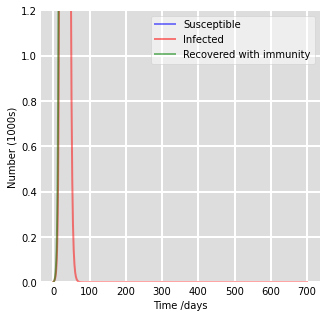

In [ ]:
fig = plt.figure(facecolor='w',figsize=(5,5))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(time, S/10000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(time, I/10000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(time, R/10000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 13.2MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.5-cp37-none-any.whl size=200910 sha256=cdd1ac2d6820cd187fc158b60fbbc059159b68b9fb07ef844e7b1ede76ec0580
  Stored in directory: /root/.cache/pip/wheels/af/45/6e/2cac6b56090f496d5a45bfa7a41686efb36261c76d3c38b411
Successfully built mpld3


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
N = 10915000
beta = -0.00002  # infected person infects 1 other person per day
D = 14.0 # infections lasts four days
gamma = 0.003880676 #sembuh harian 5 maret:kumuatif positif 5 maret (proporsi orang yang sembuh pada 5 maret)

S0, I0, R0 = 10568025, 1159, 515  # orang yang blm terinfeksi pada 5 maret ; orang yg terinfeksi pada 5 maret ; total orang yg terinfeksi dari orang infeksi (beta/gamma)

In [ ]:
t = np.linspace(0, 126, 127) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

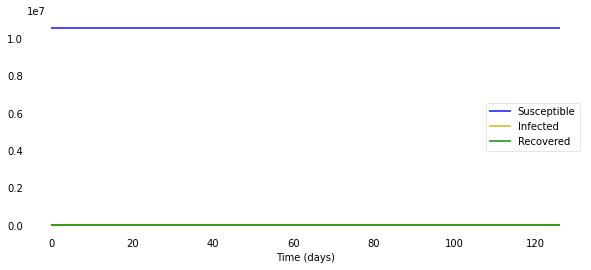

In [ ]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

plotsir(t, S, I, R)

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]



In [ ]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [ ]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

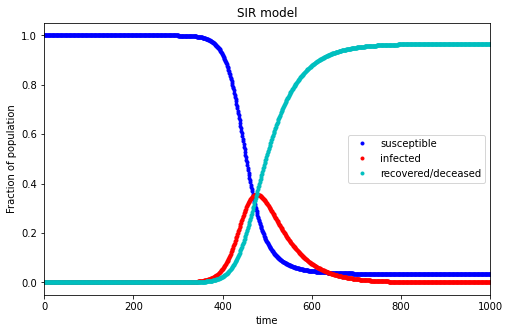

In [ ]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

# Parameters of the model
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

In [ ]:
jakarta.head(15)

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Outlier
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,1
2,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2,1
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0,1
4,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2,1
5,2020-03-06,0,0,4,4,3,0,0,4,7,4,0,0,2,2,0,0,0,0,0,0,1
6,2020-03-07,0,0,4,4,3,0,0,4,7,4,0,0,0,0,0,0,0,0,0,0,1
7,2020-03-08,0,0,6,6,3,0,0,4,7,4,0,0,2,2,0,0,0,0,0,0,1
8,2020-03-09,0,0,19,19,3,0,0,31,34,31,0,0,13,13,0,0,0,27,27,27,1
9,2020-03-10,0,2,25,27,3,0,0,31,34,31,0,2,6,8,0,0,0,0,0,0,1


In [ ]:
covid_jakarta = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx' , sheet_name='Data Indonesia dan Jakarta')
vaksin_jakarta = pd.read_excel('Total Vaksinasi Jakarta.xlsx')
x1 = vaksin_jakarta['Vaksinasi 1 Harian'].tolist()
x2 = vaksin_jakarta['Vaksinasi 2 Harian'].tolist()

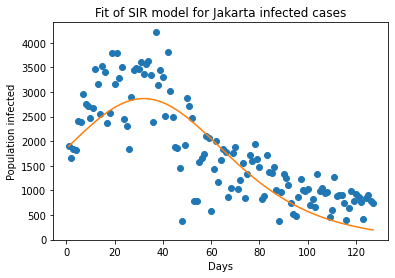

Optimal parameters: beta = 1.863052159157475  and gamma =  1.8377327581818694


In [ ]:
from scipy import integrate, optimize

tanggal = '2021-01-01'
tanggal1= '2021-05-09'

ydata =  [i for i in jakarta.loc[(jakarta['Tanggal']>tanggal) & (jakarta['Tanggal']<tanggal1) ]['Positif Harian (Jakarta)']]
ydata= np.array(ydata, dtype=float)
xdata = list(range(1,len(jakarta.loc[(jakarta['Tanggal']>tanggal) & (jakarta['Tanggal']<tanggal1)])+1))
xdata = np.array(xdata, dtype=float)

N = float(10915000-jakarta.loc[jakarta['Tanggal']==tanggal]['Positif (Jakarta)'])
inf0 = ydata[0]
sus0 = N - inf0
rec0 = float(jakarta.loc[jakarta['Tanggal']==tanggal]['Sembuh (Jakarta)'])


def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Jakarta infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show( )
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

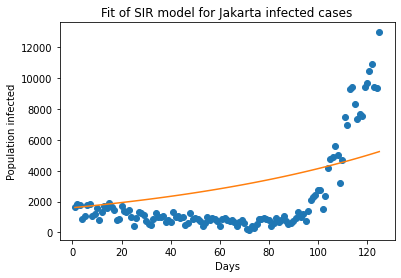

Optimal parameters: beta = -0.0005378120677679214  and gamma =  -0.01000428762393411


In [ ]:
from scipy import integrate, optimize

tanggal = '2021-03-05'
tanggal1= '2021-07-09'

ydata =  [i for i in jakarta.loc[(jakarta['Tanggal']>tanggal) & (jakarta['Tanggal']<tanggal1) ]['Positif Harian (Jakarta)']]
ydata= np.array(ydata, dtype=float)
xdata = list(range(1,len(jakarta.loc[(jakarta['Tanggal']>tanggal) & (jakarta['Tanggal']<tanggal1)])+1))
xdata = np.array(xdata, dtype=float)

N = float(10915000-jakarta.loc[jakarta['Tanggal']==tanggal]['Positif (Jakarta)'])
inf0 = ydata[0]
sus0 = N - inf0 - rec0
rec0 = float(jakarta.loc[jakarta['Tanggal']==tanggal]['Sembuh (Jakarta)'])


def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Jakarta infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show( )
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fmin

# data 
tanggal = '2020-03-01'
tanggal1= '2020-07-07'

ydata =  [i for i in jakarta.loc[(jakarta['Tanggal']>tanggal) & (jakarta['Tanggal']<tanggal1) ]['Positif Harian (Jakarta)']]
data_Inf= np.array(ydata, dtype=float)
hq = list(range(1,len(jakarta.loc[(jakarta['Tanggal']>tanggal) & (jakarta['Tanggal']<tanggal1)])+1))
Ti = np.array(xdata, dtype=float)

# nilai parameter
# Lambda = 10562088/(73*365)        
# Mu = 1/(73*365)                   
Mu_1 = 0.1*0.017
alpha = 0.0023
alpha1 = 0.0009
gamma = 0.1*0.983
eta_1 = 1/28
eta_2 = 2/365
sigma = 1/(8*30)
Beta = 0.000856791329153341
Beta_1 = (1-0.13)*Beta
Beta_2 = (1-0.65)*Beta
rates = (Beta)
print(Beta)

# initial conditions
N = float(10915000-jakarta.loc[jakarta['Tanggal']==tanggal]['Positif (Jakarta)'])
I0 = ydata[0]
R0 = float(jakarta.loc[jakarta['Tanggal']==tanggal]['Sembuh (Jakarta)'])
V10 = vaksin_jakarta.loc[vaksin_jakarta['Tanggal']==tanggal].reset_index().drop('index',axis=1)['Vaksinasi 1'] # Kelompok udah vaksin 1
V20 = vaksin_jakarta.loc[vaksin_jakarta['Tanggal']==tanggal].reset_index().drop('index',axis=1)['Vaksinasi 2'] # kelompok udah vaksin 2
S0 = N-I0-R0-V10-V20
#V10 = 7000
#V20 = 3000
y0 = [S0,I0,R0,V10,V20]

# model steps
time_start = 0.0
time_end   = Ti[-1]
intervals  = 1000
t = np.linspace(time_start,time_end,intervals)

# model index to compare to data
findindex = lambda x:np.where(t>=x)[0][0]
mindex  = list(map(findindex,Ti))

# model
def func(y0,t,N,par):
    S,V1,V2,I,R = y0
    Beta =par
    # the model equations diulang ya
    dSdt  = eta_1*V1+eta_2*V2+sigma*R-alpha*S-Beta*S*I
    dV1dt = alpha*S-Beta_1*V1*I-alpha1*V1-eta_1*V1
    dV2dt = alpha1*V1-Beta_2*V2*I-eta_2*V2
    dIdt  = Beta*S*I+Beta_1*V1*I+Beta_2*V2*I-gamma*I-(Mu_1)*I 
    dRdt  = gamma*I-sigma*R
    return dSdt,dV1dt,dV2dt,dIdt,dRdt

def solve(y0,t,N,par):
    #integrate
    ds = odeint(func,y0,t,args=(N,par))
    return (ds[:,0],ds[:,1],ds[:,2],ds[:,3],ds[:,4],t)

# Score Fit of System
def optimize(par,y0,t,N,index,hq):
    #a.Get Solution to system
    F0,F1,F2,F3,F4,T=solve(y0,t,N,par)
    #b.Pick of Model Points to Compare
    Im=F3[index]
    #c.Score Difference between model and data points
    ss=lambda data,model:((data-model)**2).sum()
    return np.sqrt(ss(hq,Im)/(len(hq)-1))
  

# Optimize Fit Phase 1
fit_score = optimize(rates,y0,t,N,mindex,hq)
answ = fmin(optimize,(rates),args=(y0,t,N,mindex,hq),full_output=1,maxiter=1000)
Beta = answ[0]
rates = (Beta)
print('RMSE = ' + str(answ[1]))
print(rates)

# Generate Solution to System
F0, F1, F2,F3,F4, T = solve(y0,t,N,rates)
print(I0)

# Plot Solution to System
plt.figure(dpi=100)
plt.plot(T ,F3, '-', color='#0652DD', label='I')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('date')
plt.ylabel('individual')
plt.grid()
plt.title('Simulasi COVID-19 di Jakarta')
plt.show()

plt.figure(dpi=100)
plt.plot(Ti,hq, '.', color='#EA2027', label='Field data for I')
plt.plot(T ,F3, '-', color='#EA2027', label='Simulation for I')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('date')
plt.ylabel('individual')
plt.grid()
plt.title('Simulasi COVID-19 di Jakarta')
plt.show()

print(y0)
print(Ti[-1])

0.000856791329153341


NameError: ignored